## Importing libraries

In [66]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#spacy
import spacy

## Reading data and basic EDA

In [67]:
#data

df = pd.read_csv('Musical_instruments_reviews.csv')

df.sample(4)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
290,AOINAOO0NQRGN,B0002CZSJO,Sessue,"[1, 1]",I can only repeat what everyone else has alrea...,5.0,And all together now...,1330473600,"02 29, 2012"
5763,A2AC3WEXSIOQQ7,B000VJJQUU,"Kevin Messerschmidt ""kainos""","[0, 0]","Cable worked fine, but the strain relief for t...",3.0,"Cheap, but built cheap",1365984000,"04 15, 2013"
8574,A1S0HTDO0P4N5V,B004FODY6E,"R. Wristen ""The Party Doc VJ and Karaoke""","[0, 0]","Great laser, nice big fat stars, red and green...",5.0,"Super cool laser, every DJ should have this an...",1340236800,"06 21, 2012"
4325,A13NWJUMVNS6YZ,B000BWEM42,Coffee Drinker,"[0, 0]","Of course, this stand is not nearly as solid f...",4.0,High portability and low price,1318377600,"10 12, 2011"


In [68]:
df.value_counts('asin')

asin
B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
             ... 
B004GYM7IE      5
B000LPUV8K      5
B000LAT0AK      5
B004HJ9COU      5
1384719342      5
Length: 900, dtype: int64

We want to work with the most reviewed product for the simplicity, but the whole process could be done for any amount of different products.
Lets take the most reviewed one.

In [69]:
most_df = df[df['asin'] == 'B003VWJ2K8'] #most reviewed product

most_df.sample(4)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
8206,A2WYAHJGST6AOT,B003VWJ2K8,Matt,"[0, 0]","This tuner works really well, i bought one a f...",4.0,Great little tuner,1393113600,"02 23, 2014"
8157,ACP8IZY0RS49F,B003VWJ2K8,"George Hartselle II ""BamaGeo""","[0, 0]",Very good tuner and I love that it attached to...,5.0,I own two.........,1397088000,"04 10, 2014"
8238,A1GXJW4152V4LJ,B003VWJ2K8,"Sean P. Owens ""Lupus Non Mordet Lupum""","[0, 0]",I am but a mere novice when it comes to playin...,5.0,Good things come in small packages.,1384732800,"11 18, 2013"
8263,AYTKUTAP0VA53,B003VWJ2K8,Yakov Hadash,"[2, 2]",Like the other one star reviewers -- my proble...,1.0,Broken head,1388534400,"01 1, 2014"


In [70]:
#shape of the dataframe
print(most_df.shape)
#data types
print(most_df.dtypes)
#summary statistics of numerical columns
print(most_df.describe())

(163, 9)
reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object
          overall  unixReviewTime
count  163.000000    1.630000e+02
mean     4.687117    1.362888e+09
std      0.827919    2.971961e+07
min      1.000000    1.289347e+09
25%      5.000000    1.343866e+09
50%      5.000000    1.365206e+09
75%      5.000000    1.387411e+09
max      5.000000    1.404605e+09


In [71]:
#checking for missing values
print(most_df.isnull().sum())

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64


## Distributions of Ratings and Review Lengths

In [72]:
fig = px.histogram(most_df, x='overall', color='overall', title='Distribution of Ratings')
fig.update_layout(xaxis_title='Overall Rating', yaxis_title='Frequency')
fig.show()

In [73]:
#As a pie chart
fig = px.pie(most_df, names='overall', title='Distribution of Ratings')
#Replace the default 'value' labels by 'Rating'
fig.update_traces(textinfo='label+percent')
fig.show()


In [74]:
fig = px.histogram(most_df, x=most_df['reviewText'].apply(len), nbins=20, title='Distribution of Review Lengths')
fig.update_layout(xaxis_title='Review Length', yaxis_title='Frequency')
fig.show()

In [75]:
#the longest review
most_df[most_df['reviewText'].apply(len) == max(most_df['reviewText'].apply(len))]['reviewText'].values[0]

"Although I didn't purchase my Snark SN-1 on Amazon, I wanted to share my excellent customer service experience about a company that clearly cares about its customers. I had a problem with my Snark, and the company displayed first class customer service -- exceeding my expectations. The SN-1 is a must-have as far as I'm concerned. I had been using my iPhone until a friend recommended the Snark tuner. SO much easier to use, and I like the logical incremental LED display that shows if you're flat or sharp. On my iPhone, the app I've been using doesn't always display the frequency when I'm really out of tune, so I have no visual indicator of where the tuning is at. If I had a better ear, no problem, but such is not the case.Snark not only shows you with the bar display, but also displays the notes your string is playing. Much easier -- you don't need to select your tuning or anything first. It picks up your frequency on whatever string you're on and you simply dial it in.Great, sturdy cli

## Top 20 most used words and adjectives

Analyzing the top 20 most used words and top 20 adjectives in reviews helps identify common themes, sentiments, and key attributes mentioned by customers. This analysis provides a condensed summary of customer opinions, aiding in understanding overall sentiment and specific aspects of satisfaction or dissatisfaction. It helps businesses make informed decisions for improving products or services based on customer feedback.

In [76]:
from collections import Counter

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Function to calculate word frequency for a given review text
def calculate_word_frequency(review_text):
    # Process the review text using spaCy
    doc = nlp(review_text)
    
    # Extract the lemmatized tokens excluding stop words and punctuation
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    # Calculate word frequency using Counter
    word_frequency = Counter(tokens)
    
    return word_frequency

#total word frequency
word_frequency = calculate_word_frequency(' '.join(most_df['reviewText'].values))

#dataframe
word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['word', 'frequency'])

word_frequency_df = word_frequency_df.sort_values('frequency', ascending=False).reset_index(drop=True)

In [77]:
#drop space and empty string
word_frequency_df = word_frequency_df.drop([0, 1]).reset_index(drop=True)

In [78]:
word_frequency_df.head(10)

,word,frequency
0,guitar,124
1,tune,100
2,easy,87
3,use,85
4,work,74
5,snark,66
6,good,57
7,buy,55
8,great,53
9,like,49


<AxesSubplot: title={'center': 'Top 20 Most Frequent Words'}, xlabel='word'>

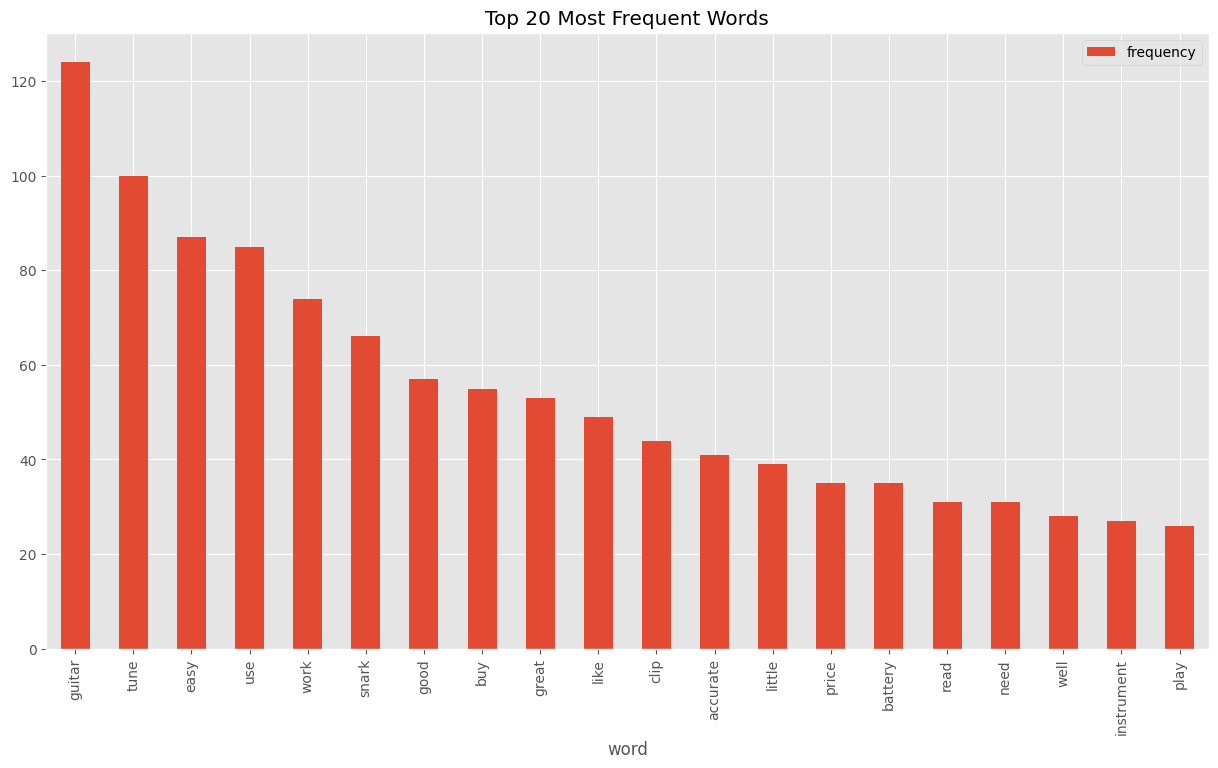

In [79]:
#Plot the top 20 most frequent words
plt.style.use('ggplot')
word_frequency_df.head(20).plot.bar(x='word', y='frequency', figsize=(15, 8), title='Top 20 Most Frequent Words')

Let's look at the most used adjectives, that people use when they review the product.

<AxesSubplot: title={'center': 'Top 20 Most Frequently Used Adjectives'}, xlabel='Adjective'>

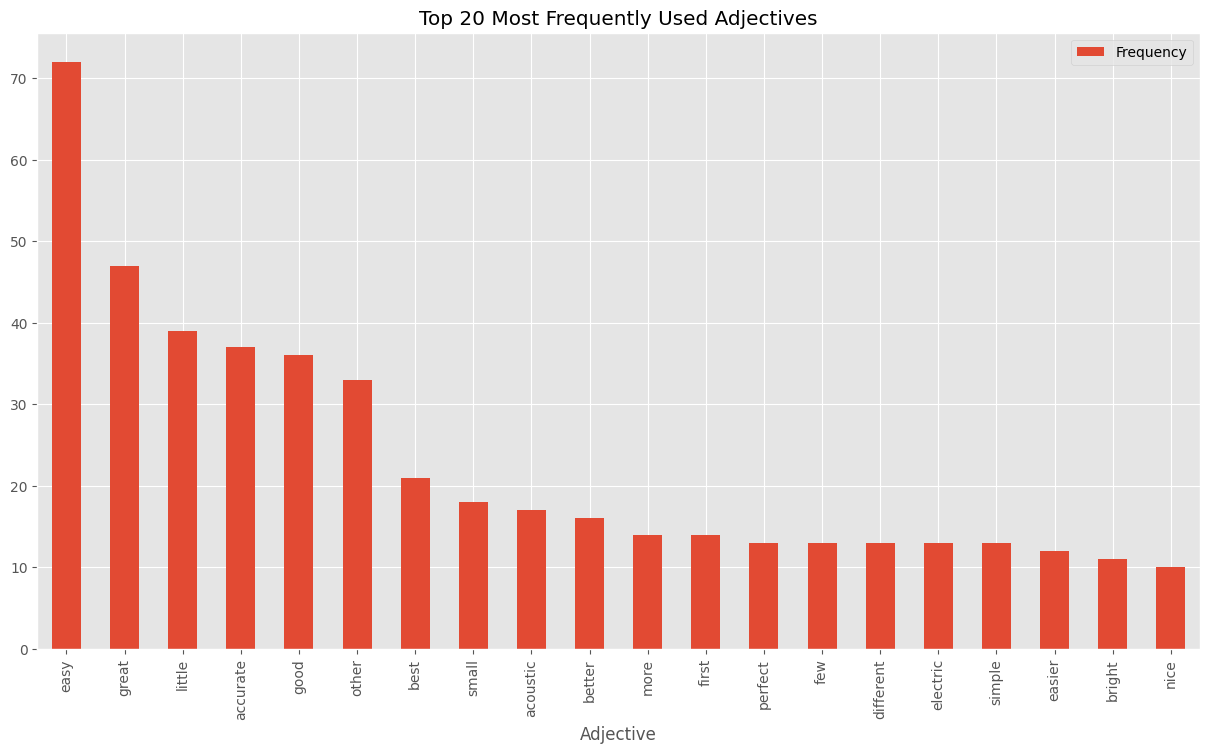

In [81]:
all_reviews = ' '.join(most_df['reviewText'])
doc = nlp(all_reviews)

adj_freq = Counter(token.text.lower() for token in doc if token.pos_ == 'ADJ')

adj_freq_df = pd.DataFrame.from_dict(adj_freq, orient='index', columns=['Frequency'])
adj_freq_df.index.name = 'Adjective'
adj_freq_df = adj_freq_df.sort_values(by='Frequency', ascending=False).head(20)

adj_freq_df.head(20).plot.bar(figsize=(15, 8), title='Top 20 Most Frequently Used Adjectives')


We can see that people mostly say that it is easy to use, great, little and accurate. Very good product!

Now let's look at bad reviews

## Top adjectives in negative reviews

<AxesSubplot: title={'center': 'Top 20 Most Frequent Adjectives in Negative Reviews'}, xlabel='Adjective'>

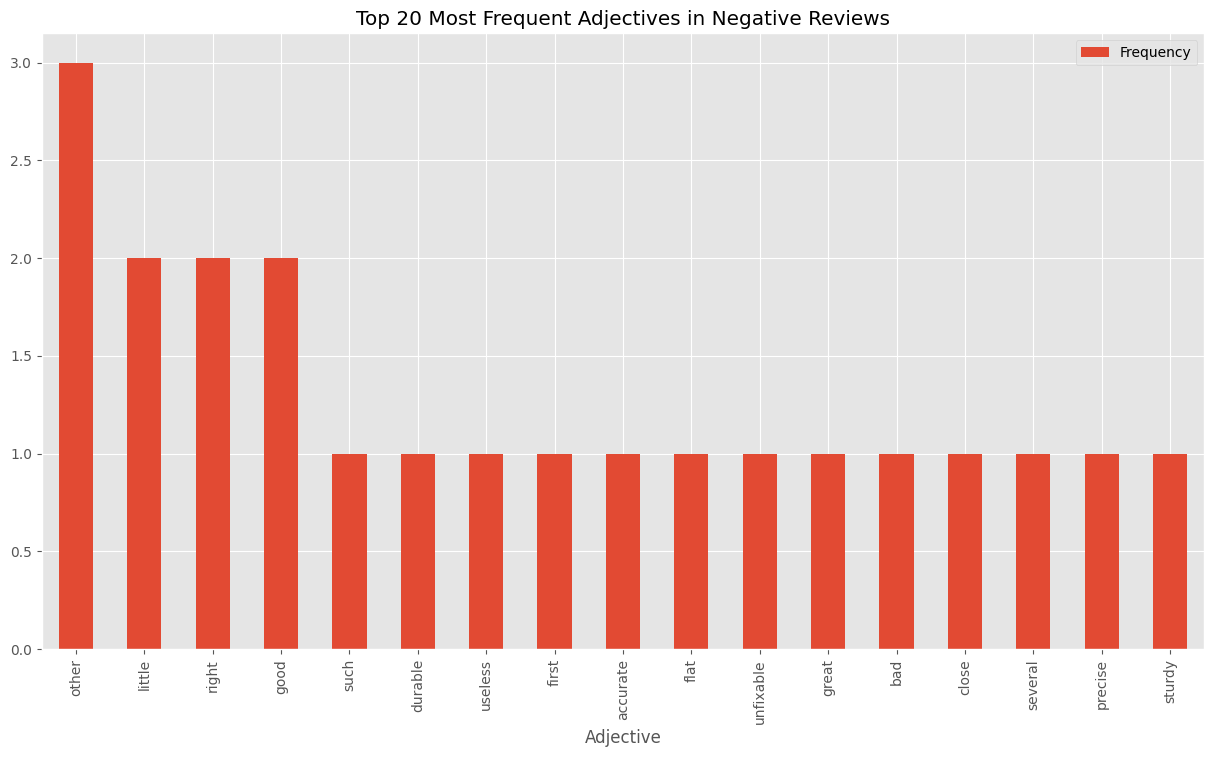

In [56]:
negative_reviews_sr = most_df[most_df['overall'] < 2]['reviewText']
negative_reviews = ' '.join(negative_reviews_sr.values)
doc = nlp(negative_reviews)

adj_freq = Counter(token.text.lower() for token in doc if token.pos_ == 'ADJ')
adj_freq_df = pd.DataFrame.from_dict(adj_freq, orient='index', columns=['Frequency'])
adj_freq_df.index.name = 'Adjective'
adj_freq_df = adj_freq_df.sort_values(by='Frequency', ascending=False).head(20)
adj_freq_df.head(20).plot.bar(figsize=(15, 8), title='Top 20 Most Frequent Adjectives in Negative Reviews')

Usage of each adjective is really low here so it is hard to make a conclusive opinion, but we can already notice words like "bad" and "useless" here. Each was written only once.